In [1]:
from tifffile import imread
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as clr
from matplotlib import cm
import numpy as np
import pandas as pd
from rich.progress import track

pd.options.mode.chained_assignment = None  # default='warn'

## Parameters and path

In [2]:
line_color = "white"  # #00274C
scalebar_color = "white"

cmap_color_start = "black"
cmap_color_end = "#b9dbf4"
cmap_name = "dark2blue"
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)

In [17]:
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/FRAP-FLIM-zstack/20230928-FLIM-FUS488-FCS-HighLowOutside/tau_tif"
os.chdir(folder_save)
lst_files = [f for f in os.listdir(".") if f.endswith("tau_1 raw.tif")]
for f in lst_files:
    print(f)

fit fov7c tau_1 raw.tif
fit fov9a tau_1 raw.tif
fit fov1 tau_1 raw.tif
fit fov6c tau_1 raw.tif
fit fov5b tau_1 raw.tif
fit fov7a tau_1 raw.tif
fit fov4 tau_1 raw.tif
fit fov5a tau_1 raw.tif
fit fov10a tau_1 raw.tif
fit fov9b tau_1 raw.tif
fit fov5c tau_1 raw.tif
fit fov8c tau_1 raw.tif
fit fov7b tau_1 raw.tif
fit fov3 tau_1 raw.tif
fit fov12a tau_1 raw.tif
fit fov6a tau_1 raw.tif
fit fov8a tau_1 raw.tif
fit fov11a tau_1 raw.tif
fit fov2 tau_1 raw.tif
fit fov8b tau_1 raw.tif
fit fov6b tau_1 raw.tif


### tau plot

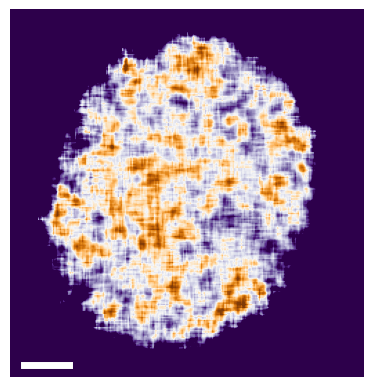

In [18]:
fname = "fit fov8b tau_1 raw.tif"
um_per_pixel_x = 0.0312
um_per_pixel_y = 0.0298
ratio_x2y = um_per_pixel_x / um_per_pixel_y
vmin = 3.3
vmax = 3.5

img = imread(fname)
img = img / 1e3
img[img == 0] = np.nan
plt.figure()
plt.imshow(
    img,
    cmap="PuOr",
    vmin=vmin,
    vmax=vmax,
    aspect=ratio_x2y,
)
# plot color bar for time
# cbar = plt.colorbar(
#     cm.ScalarMappable(norm=clr.Normalize(vmin, vmax), cmap="PuOr"),
#     ax=plt.gca(),
#     orientation="vertical",
#     pad=0.05,
#     drawedges=False,
# )
# cbar.set_label(
#     label="Life Time, ns",
#     weight="bold",
#     fontsize=21,
#     labelpad=-10,
#     family="Arial",
# )
# cbar.set_ticks(
#     [
#         round(vmin, 2),
#         round(vmax, 2),
#     ]
# )
# cbar.ax.tick_params(labelsize=21)

# plot scale bar
scalebar_length_um = 1
scalebar_length_pxl_x = scalebar_length_um / um_per_pixel_x
plt.plot(
    [10, 10 + scalebar_length_pxl_x],
    [img.shape[1] - 10, img.shape[1] - 10],
    "-",
    color="white",
    lw=5,
)

plt.axis("off")
plt.savefig(
    fname[:-4] + ".png",
    dpi=600,
    format="png",
    bbox_inches="tight",
)
plt.show()

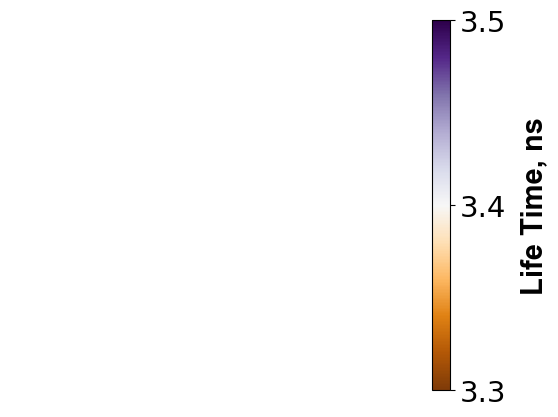

In [13]:
plt.figure()
# plot color bar for time
cbar = plt.colorbar(
    cm.ScalarMappable(norm=clr.Normalize(vmin, vmax), cmap="PuOr"),
    ax=plt.gca(),
    orientation="vertical",
    pad=0.05,
    drawedges=False,
)
cbar.set_label(
    label="Life Time, ns",
    weight="bold",
    fontsize=21,
    labelpad=10,
    family="Arial",
)
cbar.set_ticks([3.3, 3.4, 3.5])
cbar.ax.tick_params(labelsize=21)

plt.axis("off")
plt.savefig(
    "color_bar.png",
    dpi=600,
    format="png",
    bbox_inches="tight",
)
plt.show()

In [13]:
# fname = lst_files[idx]
# img = imread(fname)
# um_per_pixel_xy = 0.04
# plt.figure(figsize=(7,2))
# plt.hist(img.reshape(-1), bins=100)
# plt.show()
# img = np.nan_to_num(img)
# idx += 1

### chi2 plot

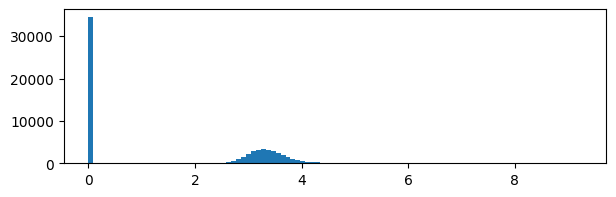

In [91]:
fname2 = "fit fov6a chi2 raw.tif"
img2 = imread(fname2)
img2 = np.nan_to_num(img2)
um_per_pixel_xy = 0.04
plt.figure(figsize=(7,2))
plt.hist(img2.reshape(-1), bins=100)
plt.show()

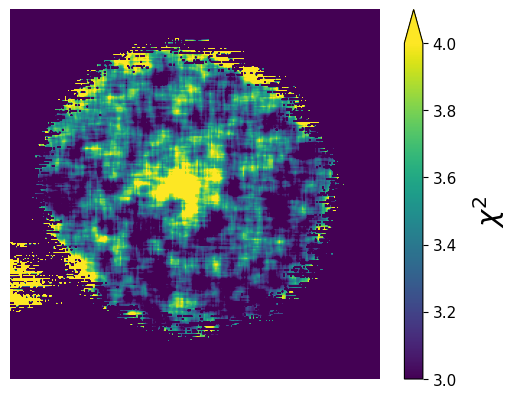

In [95]:
plt.figure()
vmin=3
vmax=4
plt.imshow(
    img2,
    cmap="viridis",
    vmin=vmin,
    vmax=vmax,
)
# plot color bar for time
cbar = plt.colorbar(
    cm.ScalarMappable(norm=clr.Normalize(vmin, vmax), cmap="viridis"),
    ax=plt.gca(),
    orientation="vertical",
    pad=0.05,
    drawedges=False,
    extendfrac=0.1,
    extend="max",
)
cbar.set_label(
    label=r"$\chi^2$",
    weight="bold",
    fontsize=21,
    labelpad=10,
    family="Arial",
)
cbar.ax.tick_params(labelsize=11)
plt.axis("off")
plt.savefig(fname2[:-4]+".png", dpi=300, format="png", bbox_inches="tight")
plt.show()

In [ ]:
# plot scale bar
# scalebar_length_um = 1
# scalebar_length_pxl_x = scalebar_length_um / um_per_pixel_xy
# plt.plot(
#     [10, 10 + scalebar_length_pxl_x],
#     [10, 10],
#     "-",
#     color="white",
#     lw=5,
# )
# plt.gca().invert_yaxis()